# Урок 4. Визуальный анализ данных
## Условие 1: Задача 1
Постройте график \
Назовите график  
Сделайте именование оси x и оси y <br>
Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data

скачиваем данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5349842/attachment/16ab1213a48b859e6e5e7407e10933ff.csv

сразу загружаем и необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('kc-house-data.csv', sep=',')

In [2]:
df.shape

(21613, 21)

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Можно было бы удалить колонку ID - как 

### 1.2. Изучите стоимости недвижимости  


Text(0, 0.5, 'Количество')

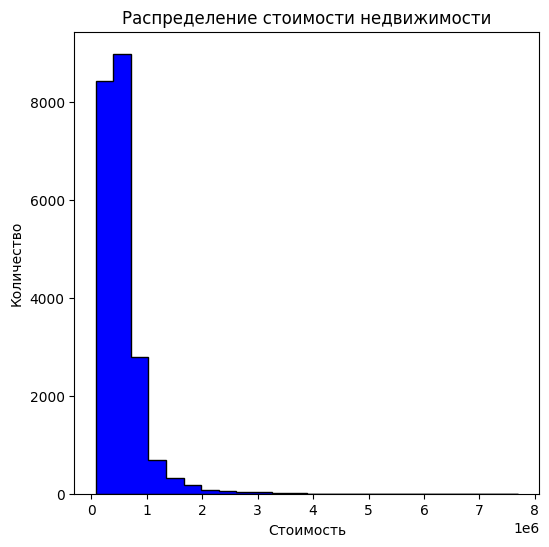

In [4]:
plt.figure(figsize=(6, 6))
plt.hist(df['price'], color = 'blue', edgecolor = 'black', bins = 'doane', histtype='stepfilled')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

**вывод - большинство квартир имеют стоимость до миллиона**


### 1.3. Изучите распределение квадратуры жилой  


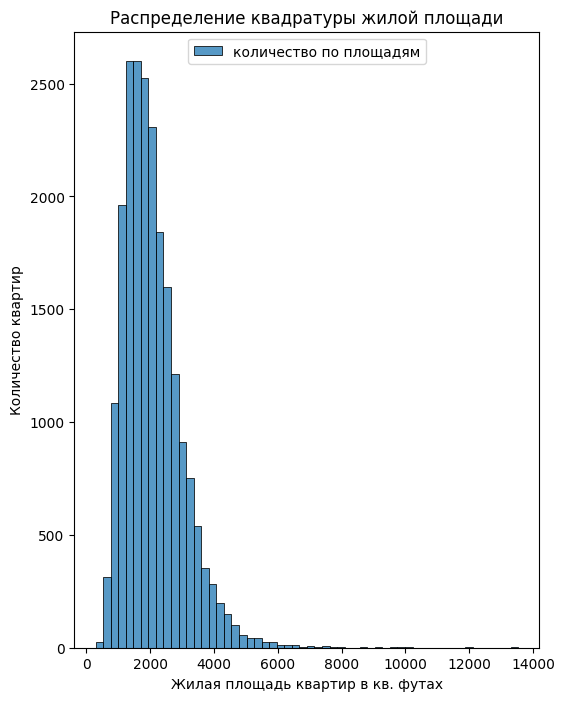

In [5]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins='rice', label='количество по площадям')

plt.title('Распределение квадратуры жилой площади')
plt.legend(loc='upper center')
plt.xlabel('Жилая площадь квартир в кв. футах')
plt.ylabel('Количество квартир');

**вывод - наибольшая популярность у квартир с площадью от 1000 до 3000 фут2**


### 1.4. Изучите распределение года постройки  

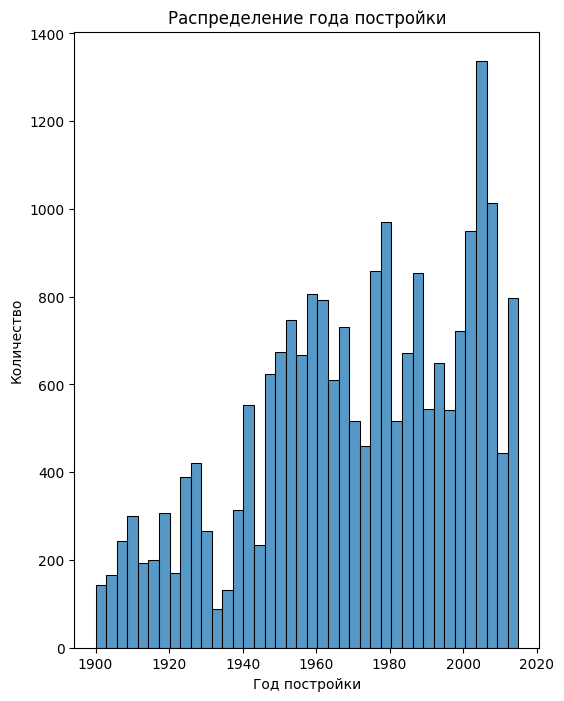

In [6]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=40)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

**вывод - жилой фонд имеет широкий диапазон по дате строительства, но преобладают дома с "возрастом" от 60 лет, с пиками количества около 1980 и 2010 годов постройки**

## Условие 2: 2 задача
### 2.1. Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы  


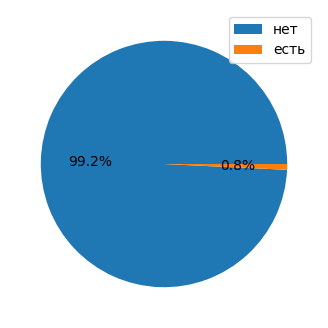

In [7]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['нет', 'есть']);

**вывод - менее 1% домов имеют вид на море**


### 2.2. Изучите распределение этажей домов  


In [8]:

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.annotate(y_list[i-1],(x_list[i-1],y_list[i-1]),ha="center")

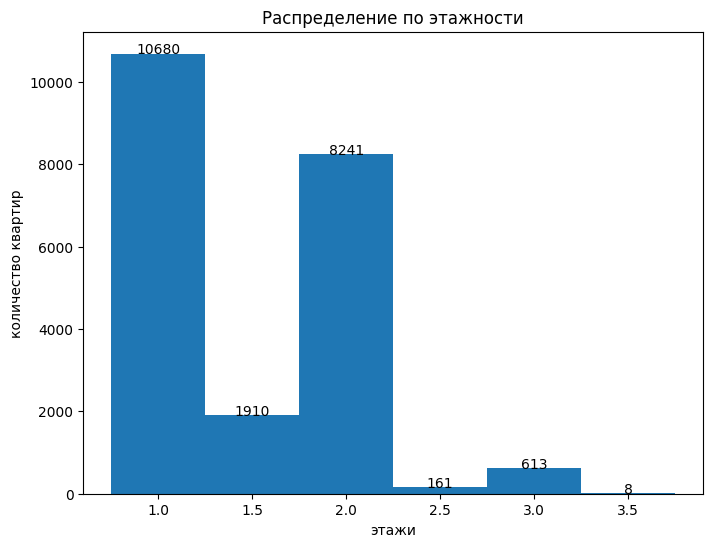

In [9]:
plt.figure(figsize=(8, 6))
data = df['floors'].value_counts()
plt.bar(data.index, data.values, width=0.5)
add_value_label(data.index, data.values)
plt.title("Распределение по этажности")
plt.xlabel("этажи")
plt.ylabel("количество квартир")
plt.show()

**вывод - большинство квартир имеют 1 или 2 этажа**


### 2.3. Изучите распределение состояния домов  

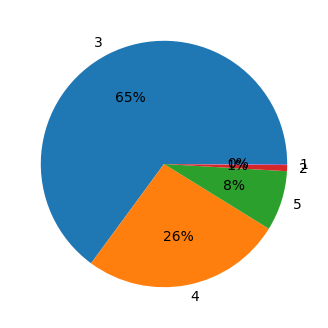

In [10]:
data = df['condition'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.0f%%', labels=data.index);

**вывод - большинство квартир имеют средний уровень изношенности**

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. \
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0


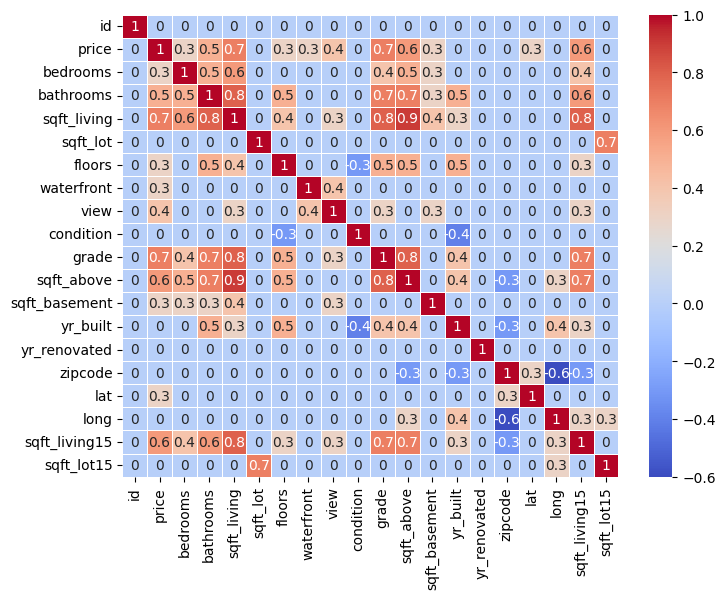

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

**вывод - цена квартир в большей степени коррелирует с количеством жилой площади, и состоянием квартир, в меньшей степени с площадью без подвала и площадью квартир ближайших 15 соседей, также влияющим фактором явлется кодичество ванных комнат**

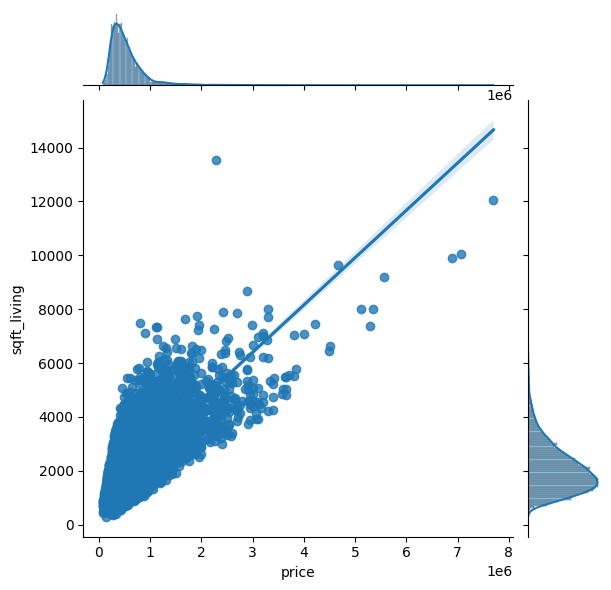

In [13]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

**вывод - чем больше жилплощадь дома, тем выше его стоимость**

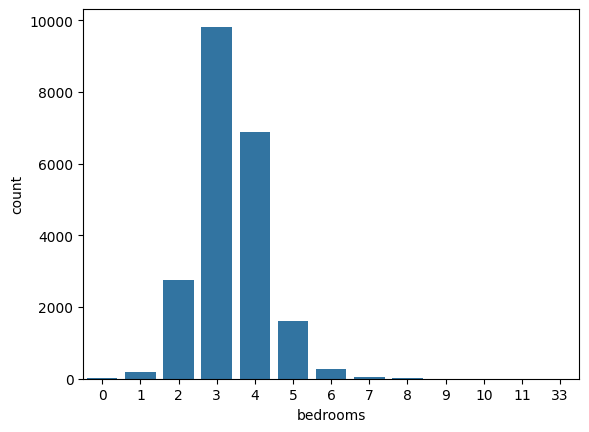

In [14]:
sns.countplot(x='bedrooms',data=df);

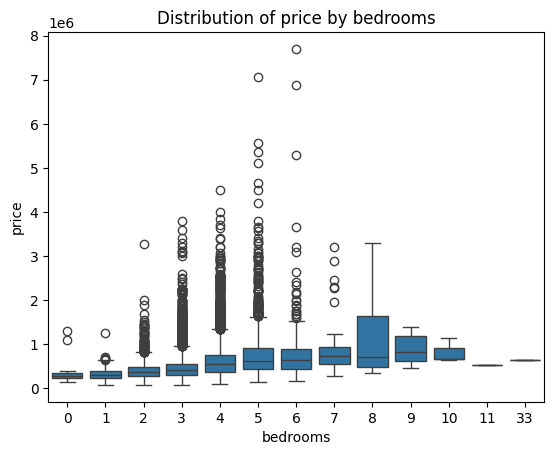

In [15]:
sns.boxplot(x='bedrooms',y='price',data=df,showfliers=True)
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Distribution of price by bedrooms');

**вывод - количество ванных комнат неоднозначно коррелирует со стоимостью - много выбросов**

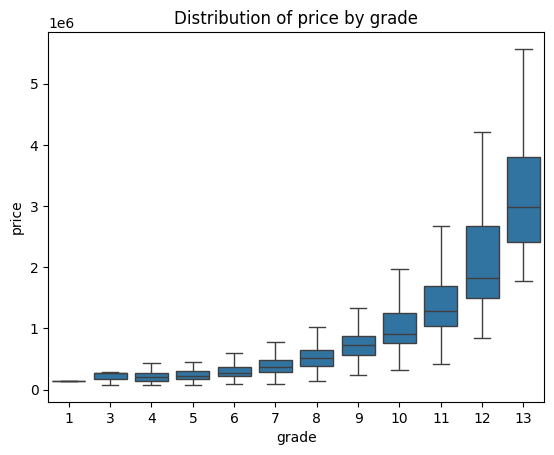

In [16]:
sns.boxplot(x='grade',y='price',data=df,showfliers=False)
plt.xlabel('grade')
plt.ylabel('price')
plt.title('Distribution of price by grade');

**вывод - наибольшую стоимость имеют дома с интегральной оценкой 13. Чем выше оценка - тем выше стоимость**

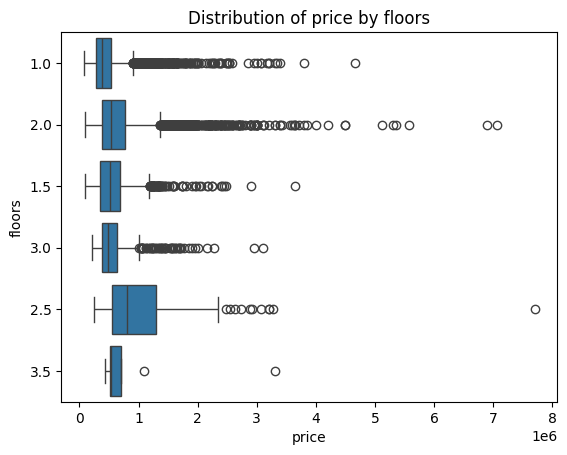

In [17]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

**вывод - наибольшую стоимость имеют дома с количеством этажей 2,5**

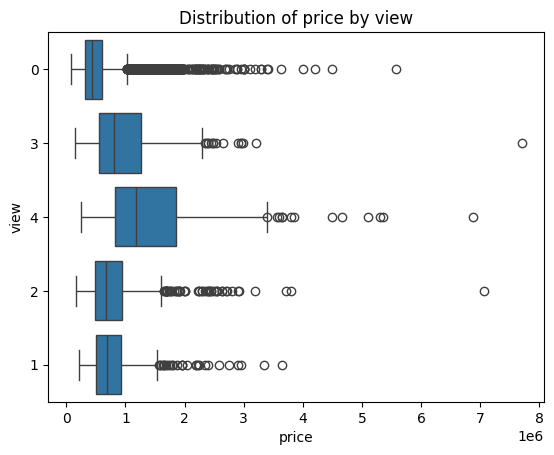

In [18]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

**вывод - Наибольшую стоимость имеют дома с оценкой вида 4**

## ***Общий вывод***

In [19]:
price = df.groupby(['grade', 'sqft_living']).agg({'price':'mean'}).sort_values(by='price', ascending=False)
price.head(10)

price
grade sqft_living           
13    12050        7700000.0
11    10040        7062500.0
13    9890         6885000.0
      9200         5570000.0
12    8000         5350000.0
      7390         5300000.0
      8010         5110800.0
      9640         4668000.0
      6430         4489000.0
      7440         4208000.0

In [20]:
df['price'].mean(), df['sqft_living'].mean()


(540088.1417665294, 2079.8997362698374)

**Выбор большинства владельцев недвижимости обусловлен оптимальным соотношением цены жилья и его характеристиками - общей оценкой, жилой площадью. Общая оценка - интегральный показатель , включающий в себя отдельные параметры типа количества ванных комнат, вид из окна, наличие подвала и т.п. В анализе не учитывалось географическое расположение жилья.**
